In [2]:
import pandas as pd
import numpy as np
from itertools import chain
from unidecode import unidecode
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt



In [3]:
pd.set_option('display.max_rows', 500)

In [4]:
raw_off_df = pd.read_csv("/Users/thibaultrolland/Projects/arcom/data/en.openfoodfacts.org.products.csv", sep='\t')

/var/folders/cf/xcc222mj0yg3dzy7mljbx99w0000gn/T/ipykernel_15458/3360868185.py:1: DtypeWarning: Columns (0,9,15,21,22,23,29,30,31,32,33,42,44,50,54,65,70,148) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_off_df = pd.read_csv("/Users/thibaultrolland/Projects/arcom/data/en.openfoodfacts.org.products.csv", sep='\t')


In [5]:
raw_arcom_df = pd.read_csv("/Users/thibaultrolland/Projects/arcom/data/ARCOM.csv")

/var/folders/cf/xcc222mj0yg3dzy7mljbx99w0000gn/T/ipykernel_15458/1379898180.py:1: DtypeWarning: Columns (37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_arcom_df = pd.read_csv("/Users/thibaultrolland/Projects/arcom/data/ARCOM.csv")


# Cleaning

In [6]:
mots_vides = set(stopwords.words('french'))
articles = ['le', 'la', 'les', 'un', 'une', 'de', 'du', 'des']

def remove_articles_and_stopwords(text):
    # word_tokenize raises an issue with words like M&M, where the tokens would become : ['M', '&', 'M'] and be all removed
    #tokens = word_tokenize(text, language='french')
    tokens = text.split(' ')
    mots_filtres = [mot.lower() for mot in tokens if mot.lower() not in mots_vides and mot.lower() not in articles]   
    return ' '.join(mots_filtres)

## arcom

In [7]:
mapping_marques = {
    'yoplait': 'yoplait',
    'm&m': 'm&m\'s',
    'alpro': 'alpro',
    'amora': 'amora',
    'bahlsen': 'bahlsen',
    'beghin say': 'beghin say',
    'bel fromageries': 'bel',
    'biraghi': 'biraghi',
    'bledina': 'bledina' ,
    'bn': 'bn',
    'boursin cuisine': 'boursin',
    'bridou': 'justin bridou',
    'brioche pasquier': 'pasquier',
    'brossard': 'brossard',
    'buitoni': 'buitoni',
    'candia': 'candia',
    'caprice anges': 'caprice dieux',
    'carte noire espresso': 'carte noire',
    'carte noire expresso': 'carte noire',
    'cas caprice': 'caprice dieux',
    'danone actimel': 'actimel',
    'danone danio': 'danio',
    'danone danonino': 'danonino',
    'danone gervais': 'gervais',
    'danone light & free': 'light & free',
    'danone taillefine': 'taillefine',
    'delacre delichoc': 'delacre',
    'ebly coeur ble': 'ebly',
    'ferrero cheri': 'cheri',
    'ferrero nutella': 'nutella',
    'ferrero couscous': 'ferrero couscous',
    'ferrero duplo': 'duplo',
    'ferrero raffaello': 'raffaello',
    'findus croustibat': 'findus',
    'fini confiserie': 'fini',
    'fishermans friend': 'fisherman friend',
    'fourme montbrison': 'entreprise laitiere sauvain',
    'fruit or omega 3': 'fruit or',
    'gallia calisma': 'laboratoire gallia',
    'gallo alimentation': 'gallo',
    'gaulois cordon bleu': 'gaulois',
    'gimbert magasin surgeles': 'gimbert ocean',
    'grand mere familial': 'grand mere',
    'gu chocolat': 'gu',
    'haribo chamallows': 'haribo',
    'haribo dragibus': 'haribo',
    'haribo fruitilicious': 'haribo',
    'haribo maoam': 'haribo',
    'haribo pik': 'haribo',
    'haribo tagada': 'haribo',
    'harry american sandwich': 'harrys',
    'hollywood 2 fresh': 'hollywood',
    'iglo claire': 'iglo',
    'islos feta': 'islos',
    'jacobs douwe tassimo': 'tassimo',
    'kellog s': 'kellogs',
    'kelloggs coco pops': 'kelloggs',
    'kelloggs extra': 'kelloggs',
    'kelloggs miel pops': 'kelloggs',
    'kelloggs nutri grain': 'kelloggs',
    'kelloggs special k': 'kelloggs',
    'kelloggs tresor': 'kelloggs',
    'kinder delice': 'kinder',
    'kinder maxi': 'kinder',
    'kinder pingui': 'kinder',
    'kinder schoko bons': 'kinder',
    'kinder bueno': 'kinder',
    'kinder surprise': 'kinder',
    'knorr douceur': 'knorr',
    'labo.ineldea': 'ineldea',
    'lactel matin leger': 'lactel',
    'lactel sporteus': 'lactel',
    'lesieur isio 4': 'lesieur',
    'liebig pur soup': 'liebig',
    'lindt champs elysees': 'lindt',
    'lindt hello my name is': 'lindt',
    'lindt lapin or': 'lindt',
    'lindt pyreneens': 'lindt',
    'lindt sensation fruit': 'lindt',
    'lipton elephant': 'lipton',
    'lipton yellow': 'lipton',
    'lorenz monster munch': 'lorenz',
    'lu cracotte': 'lu',
    'lu granola': 'lu',
    'lu mikado': 'lu',
    'lu napolitain': 'lu',
    'lu ourson': 'lu',
    'lu pepito': 'lu',
    'lu petit ecolier': 'lu',
    'lu petit lu': 'lu',
    'lu belvita': 'lu',
    'lu grany': 'lu',
    'lu prince': 'lu',
    'lu tuc': 'lu',
    'lu veritable petit beurre': 'lu',
    'marie crousti moelleuse': 'marie',
    'mars ice cream': 'mars',
    'miko carte or': 'miko',
    'miko cornetto': 'miko',
    'miko magnum': 'miko',
    'milka choco': 'milka',
    'milka melty': 'milka',
    'mini caprice': 'caprice dieux',
    'mont blanc materne': 'mont blanc',
    'movies star popcorn': 'deluxe',
    'nescafe cappuccino': 'nescafe',
    'nescafe special filtre': 'nescafe',
    'nespresso cafe vertuo': 'nespresso',
    'nespresso': 'nespresso',
    'nestle cini minis': 'cini minis',
    'nestle cookie crips': 'nestle',
    'nestle fitness': 'fitness',
    'nestle kit kat': 'kit kat',
    'nestle lion': 'nestle',
    'nestle purina': 'nestle',
    'nestle ricore': 'ricore',
    'nestle sveltesse': 'sveltesse',
    'nestle viennois': 'nestle',
    'nestle chocapic': 'chocapic',
    'nestle clusters': 'clusters',
    'nestle lanvin':'nestle',
    'nestle recettes atelier': 'nestle',
    'or cafe': 'l or',
    'panzani qualite fraichement cuisinee': 'panzani',
    'panzani si bon': 'panzani',
    'paysan breton madame loik': 'paysan breton',
    'poulain grand arome': 'poulain',
    'poulain noir': 'poulain',
    'rians faisselle': 'rians',
    'riches monts': 'richesmonts',
    'riso gallo': 'gallo',
    'senseo cafe': 'senseo',
    'starbucks coffee': 'starbucks',
    'w saurin': 'william saurin',
    'wrigley airwaves': 'wrigley s',
    'zespri kiwis': 'zespri'
    }

In [8]:
# marques dans la bdd arcom que je ne trouve pas dans la bdd off : 
# Affinity : nourriture pour animaux
# agri ethique : trouve pas

def clean_arcom_df(row):
    row['Marque'] = str(row['Marque']).replace('-', ' ')
    row['Marque'] = row['Marque'].replace('\'', ' ')
    row['Marque'] = unidecode(row['Marque'])
    row['Marque'] = remove_articles_and_stopwords(row['Marque'])

    for k,v in mapping_marques.items(): 
        if row['Marque'].startswith(k):
            row['Marque'] = v
            break   
    return row

arcom_df = raw_arcom_df.loc[raw_arcom_df['Secteur'] == 'AALIMENTATION']
arcom_df = arcom_df.apply(clean_arcom_df, axis=1)

## off

In [9]:
# this is a list of tuple : each list of each first element of tuple should be converted to the second element of each tuple
off_conversion_list = [
    ({'biscotte pasquier','brioche pasquier','brioches pasquier','gie pasquier','pasquier','pasquierbrioche pasquier'}, {'pasquier'}),
    ({ 'fruits or',  "fruit 'or", "fruit d'or",  'fruit d\\ or',  'fruit or pro activ', 'fruit or proactiv'}, {'fruit or'}),
    ({'gallo', 'riso gallo', 'riso gallo international', 'riso gallo s.p.a.'}, {'gallo'}),
    ({'gaulois',
        'gaulois (ocb) oui bon',
        'gaulois boucherie',
        'gaulois professionnel',
        'le gaulois',
        'le gaulois (ocb) oui bon',
        'le gaulois boucherie',
        'le gaulois professionnel',
        'le gaulois vegetal',
        'legaulois'},
         {'gaulois'}),
    ({'gimbert', 'gimbert ocean'}, {'gimbert ocean'}),
    ({'ineldea', 'laboratoires ineldea'}, {'ineldea'}),
    ({'nespresso'}, {'nestle'}),
    ({'or', 'l or'}, {'l or'})
]

In [10]:
def should_keep_from_off_df(row):
        if (not isinstance(row['brands'], str)): return False
        if (not isinstance(row['brands_tags'], str)): return False
        if ('France' not in [x.strip() for x in str(row['countries_en']).split(',')]): return False
        return True

def clean_off_df(row):
    brands = str(row['brands'])
    brands = brands.replace('-', ' ') #for case with 'justin-bridou'
    brands = brands.replace('\'', ' ')
    brands = unidecode(brands)
    brands = remove_articles_and_stopwords(brands)
    row['brands'] = brands
    row['brands_list'] = set([x.strip() for x in row['brands'].split(',')])
    
    if 'vico' in row['brands_list']:
        row['brands_list'] = {'vico'}
    if 'bel' in row['brands_list']:
        row['brands_list'] = {'bel'}
    
    # souci avec le couscous ferrero : il fait partie de panzani
    for brand in row['brands_list']: 
        if 'ferrero' in row['brands_list']:
            if 'couscous' in str(row['product_name']):
                row['brands_list'] = {'ferrero couscous'}
            else:
                row['brands_list'] = row['brands_list']
            break

        for t in off_conversion_list:
            if brand in t[0]:
                row['brands_list'] = t[1]
                break
        else: # not that the else is outside of the imbricated for. We want to break from both for loops if row['brands_list'] is updated
            continue
        break

    return row

off_df = raw_off_df.loc[raw_off_df.apply(should_keep_from_off_df, axis=1)]
off_df = off_df.apply(clean_off_df, axis=1)

In [11]:
arcom_brands_set = set(arcom_df['Marque'])
off_brands_set = set(chain(*off_df['brands_list']))
common_brands = arcom_brands_set.intersection(off_brands_set)

In [12]:
print("arcom brands count : " + str(len(arcom_brands_set)))
print("off brands count : " + str(len(off_brands_set)))
print("intersect brands count : " + str(len(common_brands)))

arcom brands count : 489
off brands count : 63588
intersect brands count : 440


In [13]:
# brands in arcom that we couldn't fetch from off : 
arcom_brands_set.difference(off_brands_set)

{'affinity',
 'agri ethique france',
 'almo nature',
 'american pistachios',
 'amie samba',
 'bab in',
 'catisfactions',
 'centre nat.interp.eco.lai',
 'cesar',
 'cnipt',
 'collectif nouveaux champs',
 'collective',
 'crave aliments',
 'edgard cooper',
 'flexadin advanced',
 'france bebe',
 'friskies',
 'frolic',
 'fruit or pro activ',
 'husse',
 'illaitla',
 'intendance',
 'interprofession nationale porcine',
 'japhy',
 'kraft foods europe',
 'nespresso',
 'nutri science physio',
 'pedigree',
 'pedigree dentaflex',
 'pedigree dentastix',
 'pedigree jumbone',
 'pedigree vital',
 'perfect fit',
 'purina',
 'purina felix',
 'purina fido',
 'purina gourmet',
 'purina one',
 'purina pro plan',
 'salaisons auvergne',
 'sfae',
 'so fast so good',
 'sps sarl',
 'tails com',
 'transhumancia',
 'ultra premium direct',
 'vitakraft',
 'whiskas',
 'ynovea'}

# export

In [14]:
filtered_off_df = off_df[[len(brands_list.intersection(arcom_brands_set)) > 0 for brands_list in off_df['brands_list']]]

In [15]:
# we get the index of each row per brand
index_per_brand = arcom_df.groupby('Marque').apply(lambda x: {
    'arcom_brand': {raw_arcom_df.loc[y, 'Marque'] for y in x.index},
    'arcom_id': set(x.index), 
    'off_brand': set(),
    'off_id': set()
    }).to_dict()

for i, brands_list in filtered_off_df['brands_list'].items():
    relevant_brands = brands_list.intersection(common_brands)
    for brand in relevant_brands:
        index_per_brand[brand]['off_id'].add(i)
        index_per_brand[brand]['off_brand'].add(raw_off_df.loc[i, 'brands'])

index_per_brand_out = {k: {
    'arcom_id': list(v['arcom_id']), 
    'off_id': list(v['off_id'])
} for k, v in index_per_brand.items()}


In [16]:
brands_mapping = {key: {
    'arcom_brand': list(val['arcom_brand']),
    'off_brand': list(val['off_brand'])
    } for key, val in index_per_brand.items()}

In [39]:
arcom_csv_out = {'brand_tag': [], 'n_fiche': []}
off_csv_out = {'brand_tag':[], 'code': []}
for key, value in index_per_brand.items():
    for id in value['arcom_id']:
        arcom_csv_out['brand_tag'].append(key)
        arcom_csv_out['n_fiche'].append(raw_arcom_df.loc[id, 'N° Fiche'])
    for id in value['off_id']:
        off_csv_out['brand_tag'].append(key)
        off_csv_out['code'].append(raw_off_df.loc[id, 'code'])
arcom_csv_df_out = pd.DataFrame(arcom_csv_out)
off_csv_df_out = pd.DataFrame(off_csv_out)

In [41]:
arcom_csv_df_out.to_csv('arcom_join_ids.csv')
off_csv_df_out.to_csv('off_ids_join.csv')

In [17]:
# unquote to export
import json

with open('data/cross_arcom_off/brands_mapping.json', 'w') as f:
    json.dump(brands_mapping, f)

In [18]:
with open('data/cross_arcom_off/index_per_brand.json', 'w') as f:
    json.dump(index_per_brand_out, f)

# variance of scores per brand (outdated)

## ecoscores

In [19]:
filtered_off_df['ecoscore_grade'].value_counts()

unknown           49775
b                 16426
d                 12167
c                 11233
e                  8301
a                  4112
not-applicable      309
Name: ecoscore_grade, dtype: int64

In [20]:
score_classes = ['a', 'b', 'c', 'd', 'e']

In [24]:
index_lists.items()

dict_items([('arcom_brand', {'LES 2 MARMOTTES'}), ('arcom_id', {48622, 48623}), ('off_brand', {'les 2 Marmottes', 'les 2 marmottes', 'Les 2 marmottes', 'LES 2 MARMOTTES', 'Les 2 Marmottes'}), ('off_id', {1360128, 1360129, 1360130, 1360131, 1360133, 1360135, 1360138, 519320, 1360152, 1360153, 1360154, 1360155, 1814305, 1814306, 1360709, 1360071, 1360072, 1360073, 1360074, 1360075, 1360076, 1360077, 520526, 1360078, 1360079, 1360080, 1360081, 1360082, 1360083, 1360084, 1360085, 1360086, 1360087, 1360088, 1360089, 1360090, 1360091, 1360092, 1360095, 1360096, 1360097, 1360098, 1360099, 1360100, 1360101, 1360102, 1360103, 1360104, 1360105, 1360107, 1360108, 1360110, 1360111, 1360112, 1360113, 2190835, 1360117, 1360118, 1360122, 1360123, 1360124, 1360125, 1360126, 1360127})])

In [19]:
distinct_scores_count = Counter([len(x['unique_scores']) for x in ecoscores_per_brand.values()])
distinct_scores_count = dict(sorted(distinct_scores_count.items()))

products_per_score_count = {
    0:[], 1:[], 2:[], 3:[], 4:[], 5:[]
}

for k,v in ecoscores_per_brand.items():
    count_unique = len(v['unique_scores'])
    products_per_score_count[count_unique].append(len(v[('all_scores')]))

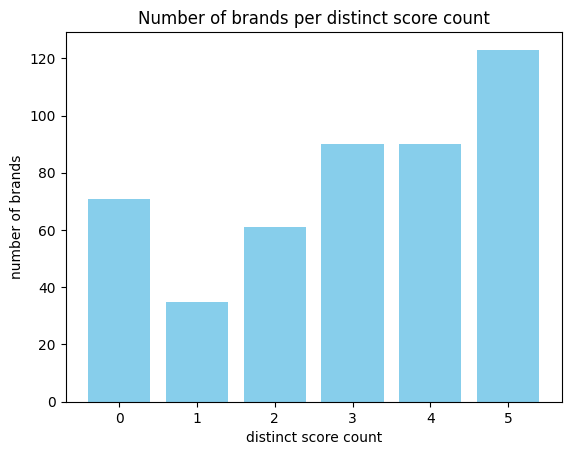

In [20]:

categories = distinct_scores_count.keys()
values = distinct_scores_count.values()

# Create a bar chart
plt.bar(categories, values, color='skyblue')

# Add labels and title
plt.xlabel('distinct score count')
plt.ylabel('number of brands')
plt.title('Number of brands per distinct score count')

# Show the plot
plt.show()

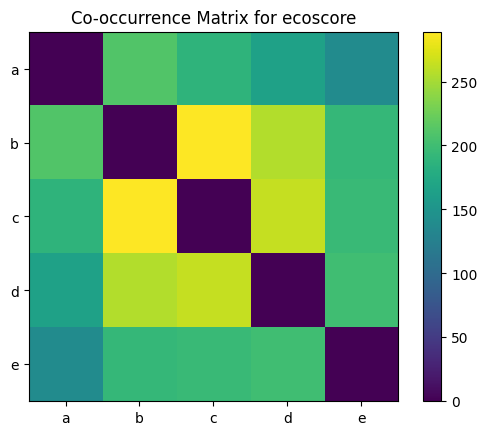

In [21]:
#Coccurence matrix of nutriscores : 

# Create a dictionary to store co-occurrence counts
co_occurrence_matrix = {item: {other_item: 0 for other_item in score_classes} for item in score_classes}

unique_scores_list = [v['unique_scores'] for k, v in ecoscores_per_brand.items()]

# Update the counts in the co-occurrence matrix
for unique_scores_for_given_grand in unique_scores_list:
    for item1 in unique_scores_for_given_grand:
        for item2 in unique_scores_for_given_grand:
            if item1 != item2:
                co_occurrence_matrix[item1][item2] += 1

# Convert the dictionary to a matrix (list of lists)
co_occurrence_matrix_list = [[co_occurrence_matrix[item1][item2] for item2 in score_classes] for item1 in score_classes]

# Convert the list to a NumPy array
co_occurrence_matrix = np.array(co_occurrence_matrix_list)

# Create a heatmap using matplotlib
plt.imshow(co_occurrence_matrix, cmap='viridis', interpolation='nearest')

# Add a colorbar
plt.colorbar()

# Add axis labels and title
plt.xticks(np.arange(len(co_occurrence_matrix_list)), labels=score_classes)
plt.yticks(np.arange(len(co_occurrence_matrix_list)), labels=score_classes)
#plt.xlabel('Items')
#plt.ylabel('Items')
plt.title('Co-occurrence Matrix for ecoscore')

# Display the plot
plt.show()

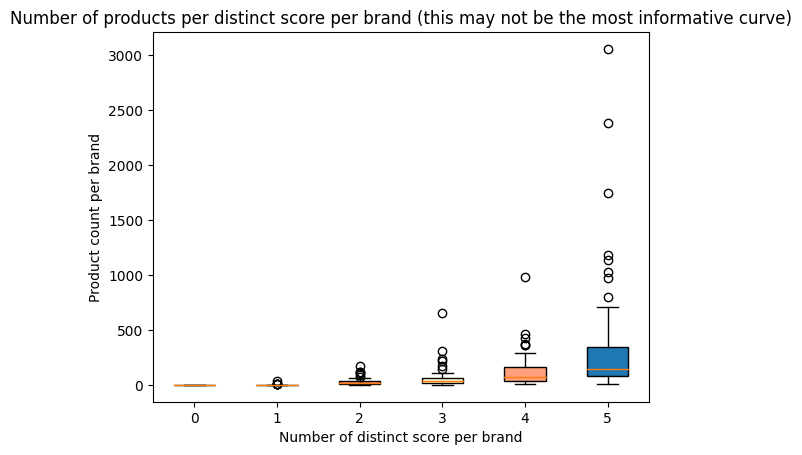

In [22]:

data = products_per_score_count.values()
labels = products_per_score_count.keys()

# Create a figure and axis
fig, ax = plt.subplots()

# Create five boxplots
boxplots = ax.boxplot(data, vert=True, patch_artist=True)

# Customize the boxplot colors
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightgoldenrodyellow', 'lightsalmon']
for box, color in zip(boxplots['boxes'], colors):
    box.set_facecolor(color)

# Add labels and title
ax.set_xticklabels(labels)
plt.ylabel('Product count per brand')
plt.xlabel('Number of distinct score per brand')
plt.title('Number of products per distinct score per brand (this may not be the most informative curve)')

# Show the plot
plt.show()

In [23]:
filtered_off_df['nutriscore_grade'].value_counts().loc[list(score_classes)]

nutriscore_grade
a    11423
b    10146
c    12929
d    15640
e     9488
Name: count, dtype: int64

## nutriscores

In [24]:
nutriscore_classes = ['a', 'b', 'c', 'd', 'e']

In [25]:
filtered_off_df['nutriscore_grade'].value_counts()

nutriscore_grade
unknown           39159
d                 15640
c                 12929
a                 11423
b                 10146
e                  9488
not-applicable     2994
Name: count, dtype: int64

In [26]:
nutriscores_per_brand = {}
for brand, index_lists in index_per_brand.items():
    off_indexes = index_lists['off']
    nutriscores = list(filtered_off_df.loc[list(off_indexes), 'nutriscore_grade'])
    nutriscores = [x for x in nutriscores if x in nutriscore_classes]
    nutriscores_per_brand[brand] = {'all_scores': nutriscores}
    nutriscores_per_brand[brand]['unique_scores'] = set(nutriscores)

In [27]:
distinct_nutriscores_count = Counter([len(x['unique_scores']) for x in nutriscores_per_brand.values()])
distinct_nutriscores_count = dict(sorted(distinct_nutriscores_count.items()))

products_per_nutriscore_count = {
    0:[], 1:[], 2:[], 3:[], 4:[], 5:[]
}

for k,v in nutriscores_per_brand.items():
    count_unique = len(v['unique_scores'])
    products_per_nutriscore_count[count_unique].append(len(v[('all_scores')]))

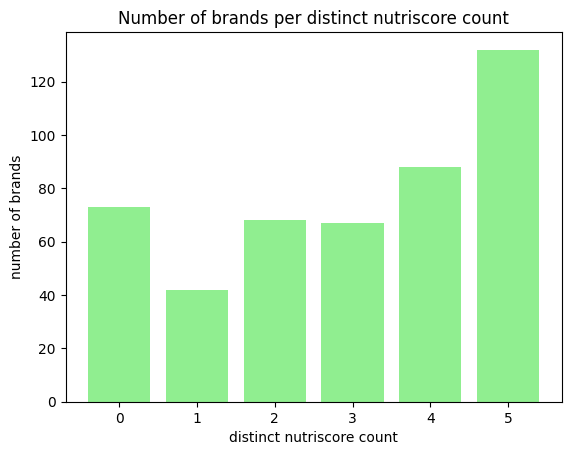

In [28]:

categories = distinct_nutriscores_count.keys()
values = distinct_nutriscores_count.values()

# Create a bar chart
plt.bar(categories, values, color='lightgreen')

# Add labels and title
plt.xlabel('distinct nutriscore count')
plt.ylabel('number of brands')
plt.title('Number of brands per distinct nutriscore count')

# Show the plot
plt.show()

In [29]:
x = raw_arcom_df.loc[['MC DO RESTAURANTS' in x for x in raw_arcom_df['Produit']]]

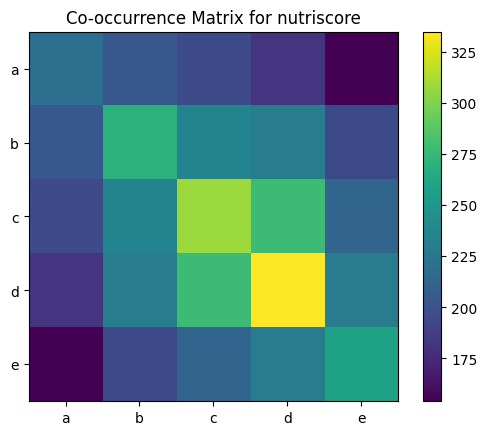

In [30]:
#Coccurence matrix of nutriscores : 

# Create a dictionary to store co-occurrence counts
co_occurrence_matrix = {item: {other_item: 0 for other_item in nutriscore_classes} for item in nutriscore_classes}

unique_nutriscores_list = [v['unique_scores'] for k, v in nutriscores_per_brand.items()]

# Update the counts in the co-occurrence matrix
for unique_nutriscores_for_given_grand in unique_nutriscores_list:
    for item1 in unique_nutriscores_for_given_grand:
        for item2 in unique_nutriscores_for_given_grand:
            co_occurrence_matrix[item1][item2] += 1

# Convert the dictionary to a matrix (list of lists)
co_occurrence_matrix_list = [[co_occurrence_matrix[item1][item2] for item2 in nutriscore_classes] for item1 in nutriscore_classes]

# Convert the list to a NumPy array
co_occurrence_matrix = np.array(co_occurrence_matrix_list)

# Create a heatmap using matplotlib
plt.imshow(co_occurrence_matrix, cmap='viridis', interpolation='nearest')

# Add a colorbar
plt.colorbar()

# Add axis labels and title
plt.xticks(np.arange(len(co_occurrence_matrix_list)), labels=score_classes)
plt.yticks(np.arange(len(co_occurrence_matrix_list)), labels=score_classes)
#plt.xlabel('Items')
#plt.ylabel('Items')
plt.title('Co-occurrence Matrix for nutriscore')

# Display the plot
plt.show()

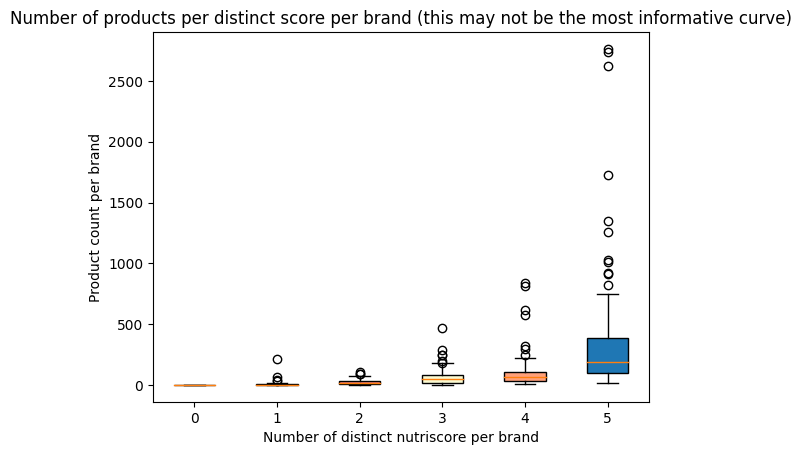

In [31]:

data = products_per_nutriscore_count.values()
labels = products_per_nutriscore_count.keys()

# Create a figure and axis
fig, ax = plt.subplots()

# Create five boxplots
boxplots = ax.boxplot(data, vert=True, patch_artist=True)

# Customize the boxplot colors
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightgoldenrodyellow', 'lightsalmon']
for box, color in zip(boxplots['boxes'], colors):
    box.set_facecolor(color)

# Add labels and title
ax.set_xticklabels(labels)
plt.ylabel('Product count per brand')
plt.xlabel('Number of distinct nutriscore per brand')
plt.title('Number of products per distinct score per brand (this may not be the most informative curve)')

# Show the plot
plt.show()

## Ecoscore group analysis

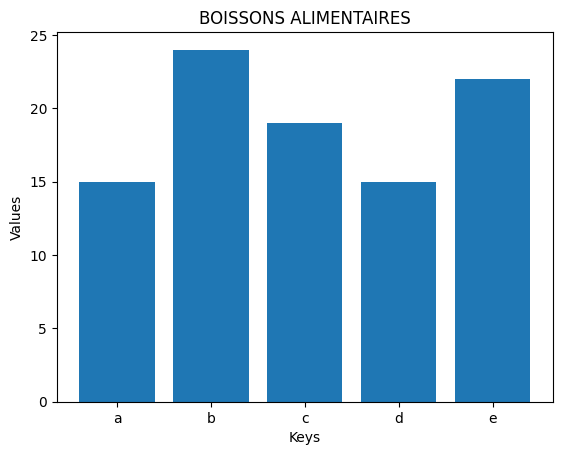

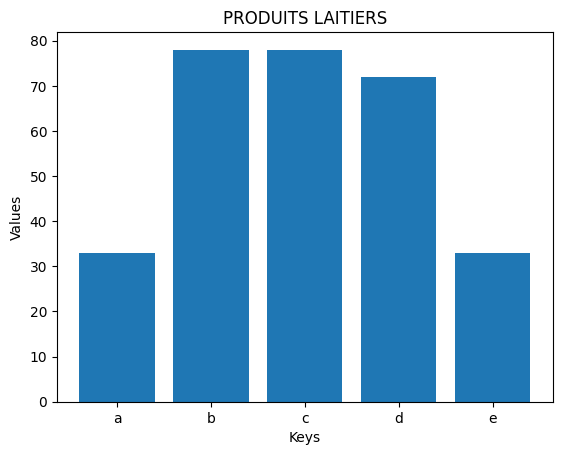

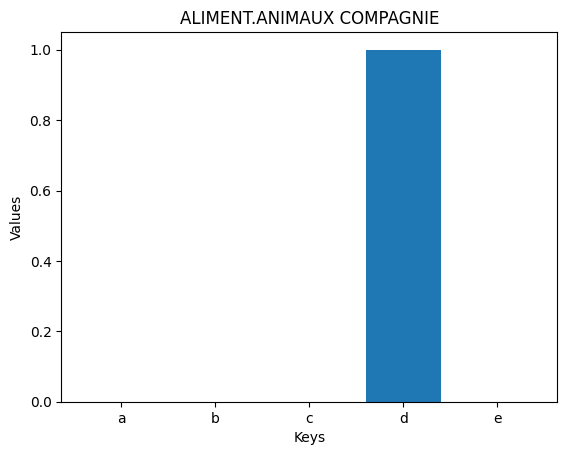

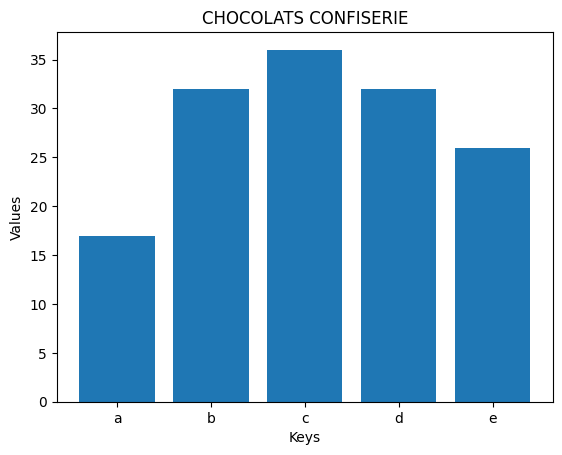

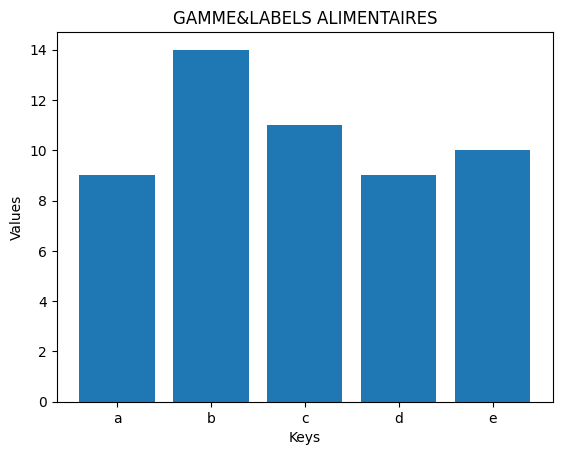

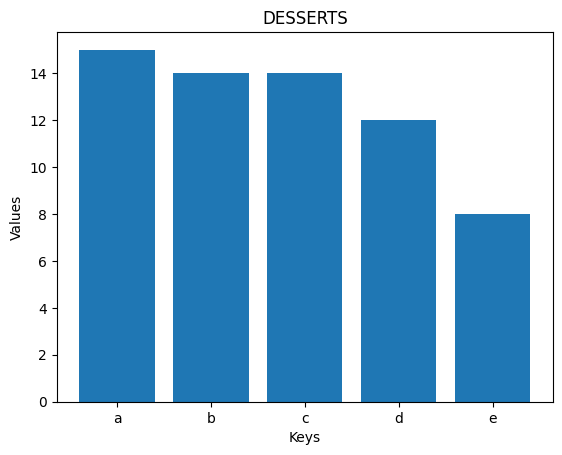

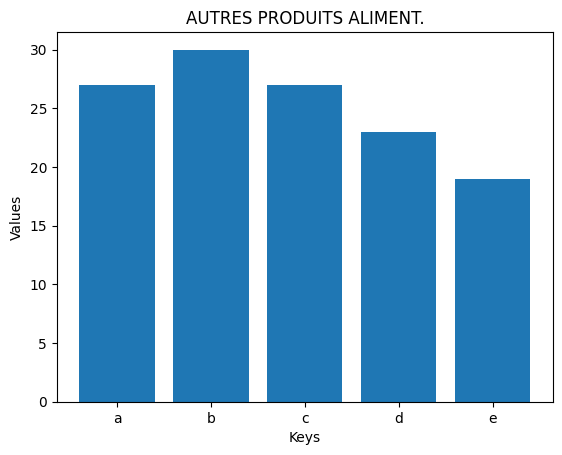

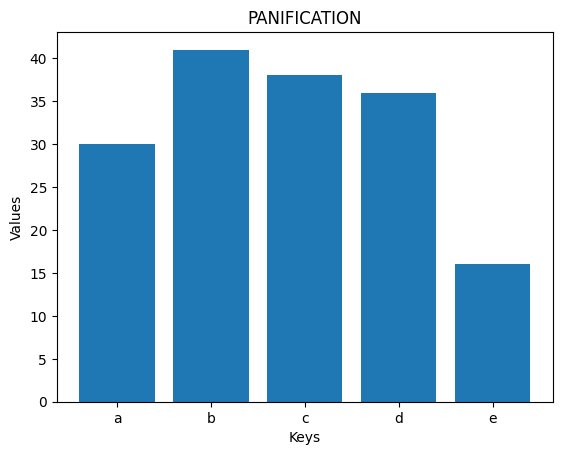

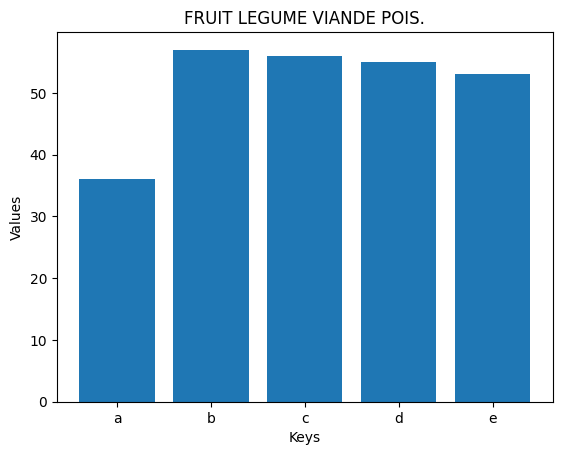

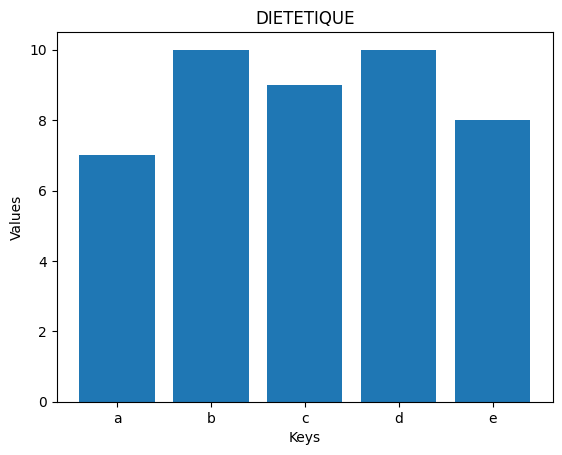

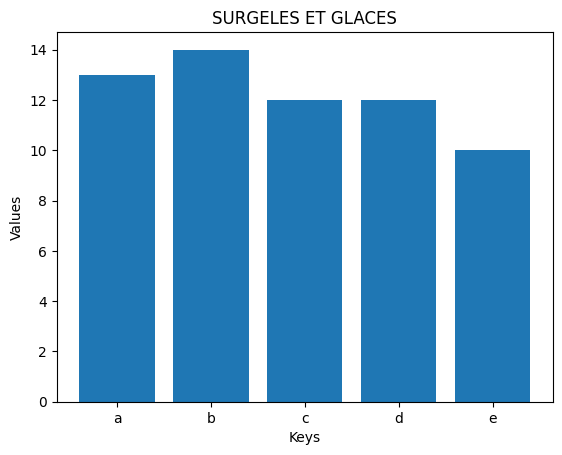

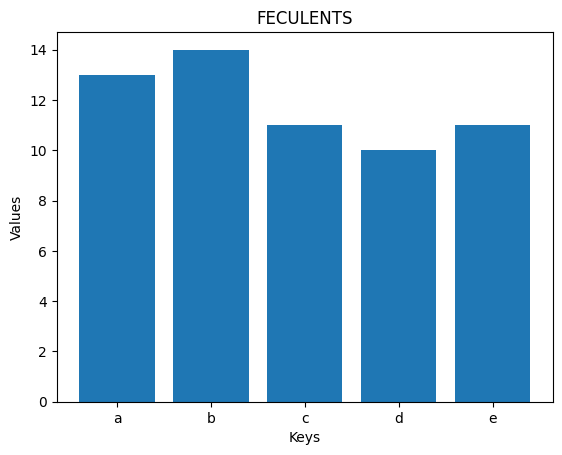

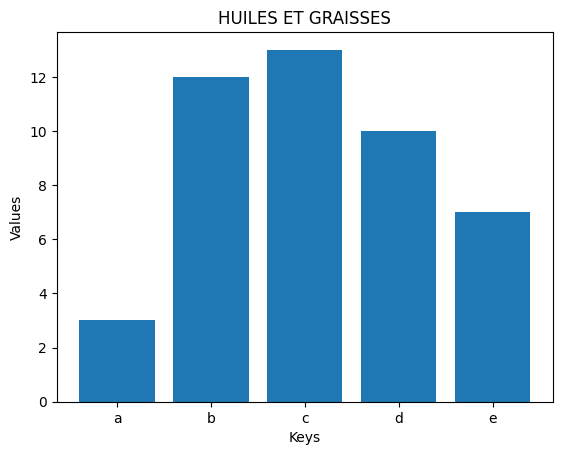

In [32]:
brands_eco_dict = {k:{
    'unique_scores': v['unique_scores'],
    'arcom_indexes': list(index_per_brand[k]['arcom'])
} for k, v in ecoscores_per_brand.items()}


sector_per_ecoscore = {k: {'sector': arcom_df.loc[brands_eco_dict[k]['arcom_indexes'], 'Classe'].iloc[0],
     'unique_scores': v['unique_scores']} 
 for k,v in brands_eco_dict.items()}

sector_brand_eco_count = {x['sector']: {'a': 0, 'b': 0, 'c':0, 'd': 0, 'e':0}  for x in sector_per_ecoscore.values()}
for v in sector_per_ecoscore.values():
    unique_scores = v['unique_scores']
    sector = v['sector']
    for score in unique_scores:
        sector_brand_eco_count[sector][score] += 1

for category, values in sector_brand_eco_count.items():
    x_values = list(values.keys())
    y_values = list(values.values())

    plt.bar(x_values, y_values)
    plt.title(category)
    plt.xlabel('Keys')
    plt.ylabel('Values')
    plt.show()

## Nutriscore group analysis

In [33]:
index_per_brand

{'2 marmottes': {'arcom': {48622, 48623},
  'off': {519320,
   520526,
   1360071,
   1360072,
   1360073,
   1360074,
   1360075,
   1360076,
   1360077,
   1360078,
   1360079,
   1360080,
   1360081,
   1360082,
   1360083,
   1360084,
   1360085,
   1360086,
   1360087,
   1360088,
   1360089,
   1360090,
   1360091,
   1360092,
   1360095,
   1360096,
   1360097,
   1360098,
   1360099,
   1360100,
   1360101,
   1360102,
   1360103,
   1360104,
   1360105,
   1360107,
   1360108,
   1360110,
   1360111,
   1360112,
   1360113,
   1360117,
   1360118,
   1360122,
   1360123,
   1360124,
   1360125,
   1360126,
   1360127,
   1360128,
   1360129,
   1360130,
   1360131,
   1360133,
   1360135,
   1360138,
   1360152,
   1360153,
   1360154,
   1360155,
   1360709,
   1814305,
   1814306,
   2190835}},
 '2 vaches': {'arcom': {291, 7253, 9430, 11323, 14129, 17678, 20659},
  'off': {509326,
   512068,
   573236,
   598946,
   802399,
   829882,
   848211,
   853556,
   969929,
   1008

In [34]:
brands_nutri_dict = {k:{
    'unique_scores': v['unique_scores'],
    'arcom_indexes': list(index_per_brand[k]['arcom'])
} for k, v in nutriscores_per_brand.items()}

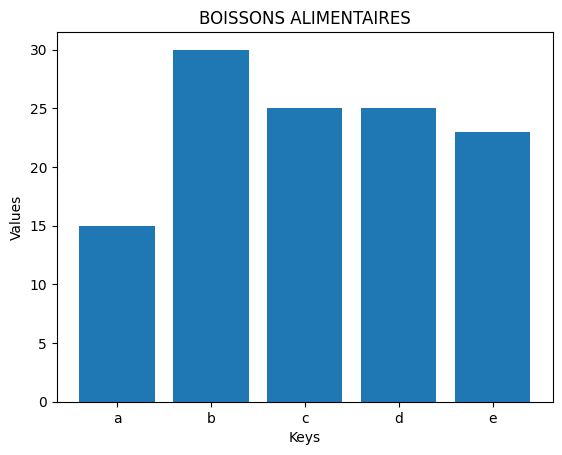

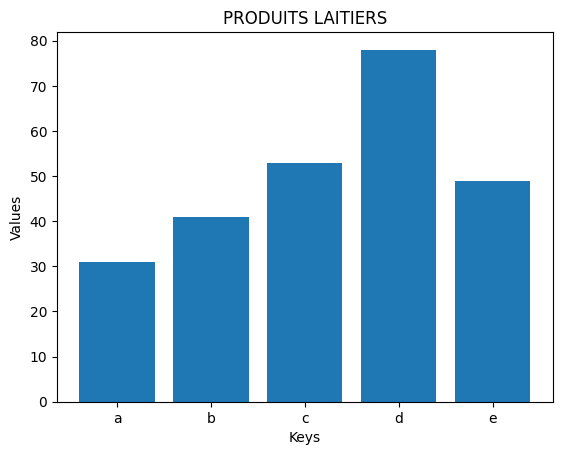

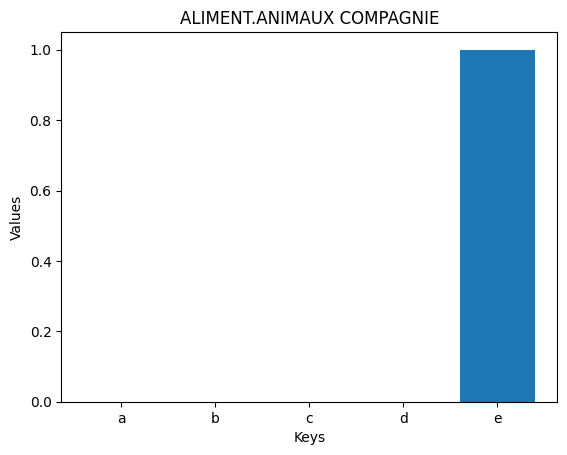

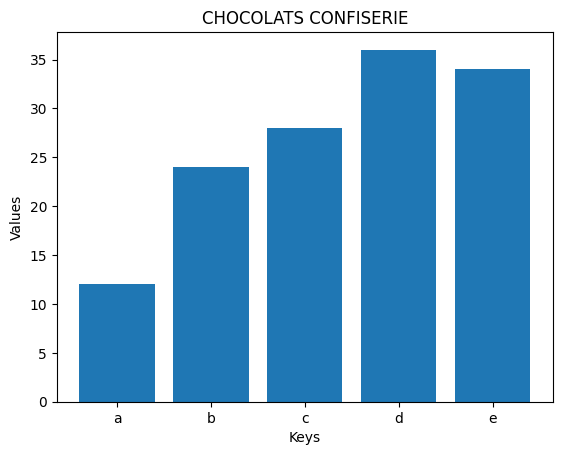

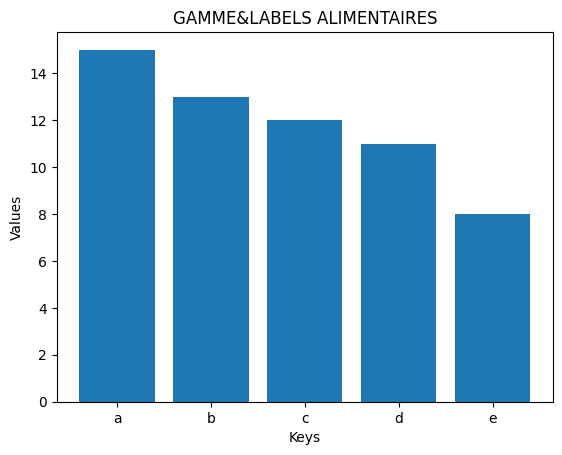

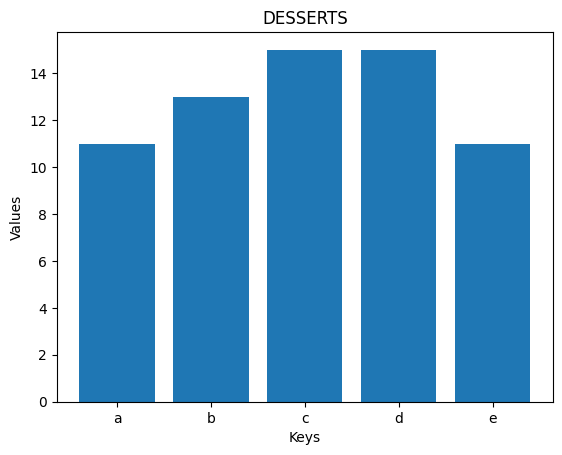

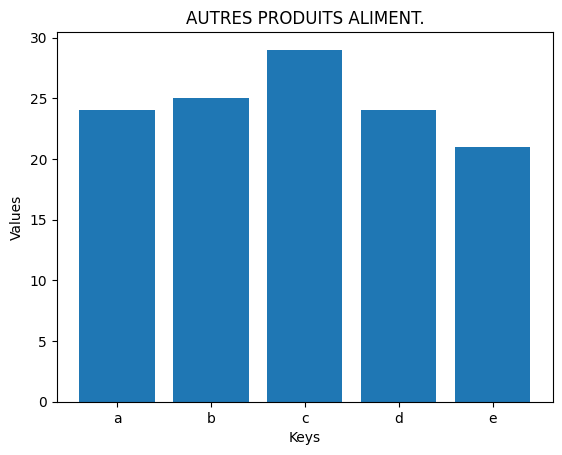

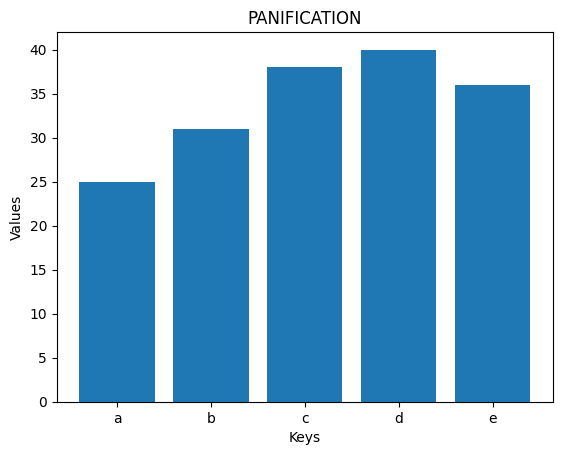

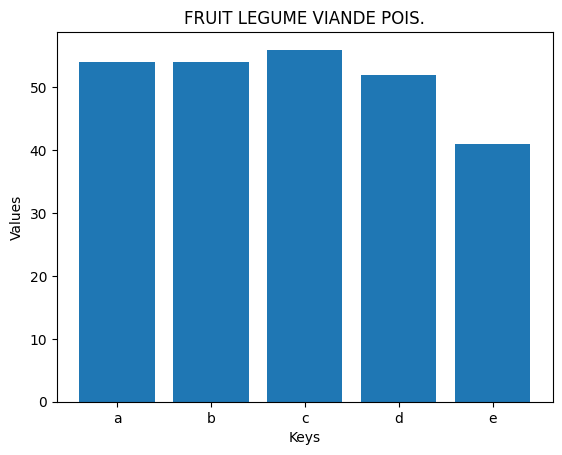

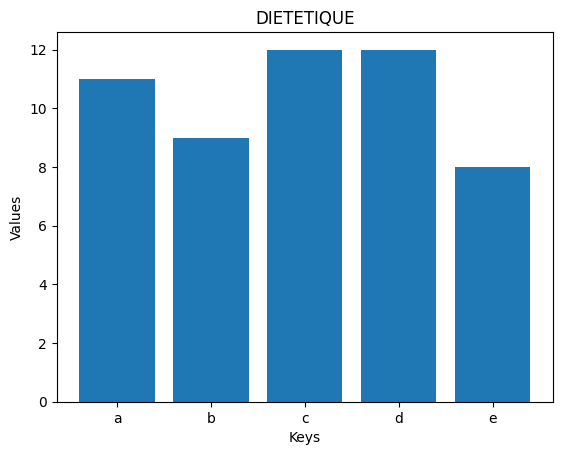

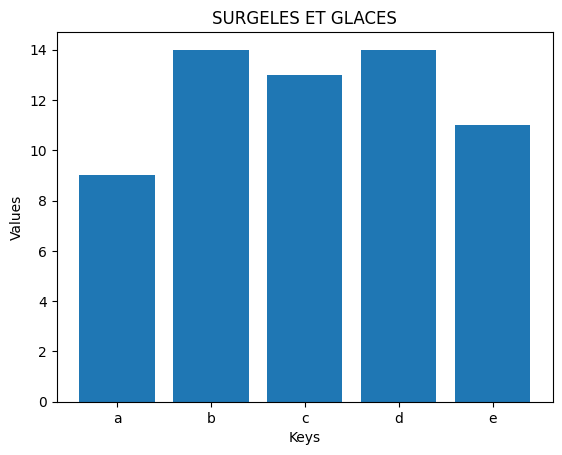

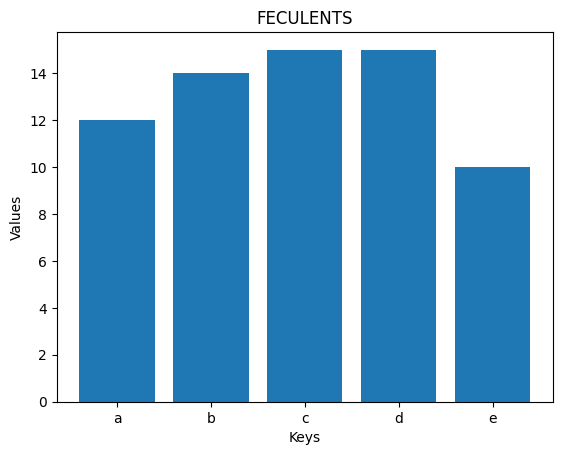

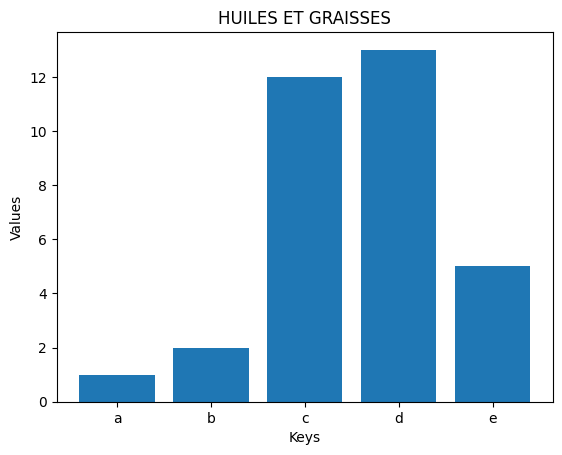

In [35]:
sector_per_score = {k: {'sector': arcom_df.loc[brands_nutri_dict[k]['arcom_indexes'], 'Classe'].iloc[0],
     'unique_scores': v['unique_scores']} 
 for k,v in brands_nutri_dict.items()}

sector_brand_nutri_count = {x['sector']: {'a': 0, 'b': 0, 'c':0, 'd': 0, 'e':0}  for x in sector_per_score.values()}
for v in sector_per_score.values():
    unique_scores = v['unique_scores']
    sector = v['sector']
    for score in unique_scores:
        sector_brand_nutri_count[sector][score] += 1

for category, values in sector_brand_nutri_count.items():
    x_values = list(values.keys())
    y_values = list(values.values())

    plt.bar(x_values, y_values)
    plt.title(category)
    plt.xlabel('Keys')
    plt.ylabel('Values')
    plt.show()

# nutriscore semantic analysis (outdated)

In [36]:
from gensim import corpora, models
import gensim
import ast
import spacy
import pprint

In [37]:
nlp = spacy.load("fr_core_news_sm")

In [38]:
brands_nutri_dict

{'2 marmottes': {'unique_scores': {'b', 'c', 'd'},
  'arcom_indexes': [48622, 48623]},
 '2 vaches': {'unique_scores': {'a', 'b', 'c', 'e'},
  'arcom_indexes': [291, 17678, 14129, 20659, 7253, 9430, 11323]},
 'a bicyclette': {'unique_scores': {'a', 'b', 'c', 'e'},
  'arcom_indexes': [22081]},
 'affinity': {'unique_scores': set(),
  'arcom_indexes': [23938,
   8452,
   19719,
   14217,
   7306,
   14218,
   35979,
   43787,
   41616,
   43792,
   2839,
   37146,
   6942,
   158,
   17694,
   26145,
   31139,
   16424,
   557,
   43832,
   45250,
   3139,
   26307,
   45253,
   48706,
   7239,
   37961,
   26965,
   46813,
   46181,
   46182,
   3564,
   23152,
   23153,
   24179,
   31347,
   37751,
   37755]},
 'after eight': {'unique_scores': {'c', 'd', 'e'},
  'arcom_indexes': [8993, 8989]},
 'agri ethique france': {'unique_scores': set(), 'arcom_indexes': [37600]},
 'almo nature': {'unique_scores': set(), 'arcom_indexes': [32600, 32601]},
 'alpro': {'unique_scores': {'a', 'b', 'c', '

In [65]:
score = 'a'

document_indexes = [x['arcom_indexes'] for x in brands_nutri_dict.values() if score in x['unique_scores']]
document_indexes = list(set(chain(*document_indexes)))
tokenized_documents = [ast.literal_eval(x) for x  in arcom_df.loc[document_indexes, 'clean_script'] if isinstance(x, str)]

dictionary = corpora.Dictionary(tokenized_documents)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_documents]

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)


In [66]:
lda_model.print_topics()

[(0,
  '0.042*"nouvelle" + 0.034*"bien" + 0.034*"chocolat" + 0.024*"fort" + 0.022*"viennois" + 0.021*"liebig" + 0.018*"nestle" + 0.017*"découvrez" + 0.017*"faire" + 0.016*"vrai"'),
 (1,
  '0.042*"chocolat" + 0.035*"lu" + 0.028*"biscuits" + 0.023*"milka" + 0.021*"plein" + 0.021*"vie" + 0.021*"moment" + 0.021*"boursin" + 0.020*"prince" + 0.018*"délicieux"'),
 (2,
  '0.052*"lait" + 0.023*"bonne" + 0.020*"pâte" + 0.020*"tendre" + 0.019*"trop" + 0.019*"candia" + 0.018*"calcium" + 0.017*"bon" + 0.016*"machine" + 0.016*"maman"'),
 (3,
  '0.025*"goût" + 0.023*"bon" + 0.020*"découvrez" + 0.018*"fruits" + 0.017*"crème" + 0.015*"unique" + 0.015*"plaisir" + 0.014*"nature" + 0.014*"petits" + 0.014*"gaulois"'),
 (4,
  '0.045*"bon" + 0.031*"non" + 0.026*"oh" + 0.025*"pomme" + 0.022*"po" + 0.021*"recettes" + 0.020*"aujourhui" + 0.018*"soir" + 0.016*"yoplait" + 0.016*"ya"'),
 (5,
  '0.029*"qualité" + 0.027*"amour" + 0.025*"agriculture" + 0.022*"aime" + 0.019*"légumes" + 0.018*"france" + 0.017*"ingrédie

In [67]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, texts=tokenized_documents, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.136736261404423

Coherence Score:  0.39274315701154455


In [68]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [69]:


# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.117418  0.046092       1        1  15.185135
1      0.001782  0.183638       2        1  10.573306
5      0.020248  0.092959       3        1   9.737334
7     -0.298836 -0.080639       4        1   9.474511
0      0.130137  0.217994       5        1   9.367839
4      0.055934 -0.144738       6        1   9.350230
8      0.167407 -0.123551       7        1   9.316251
9     -0.184778 -0.037380       8        1   9.173109
2      0.145149 -0.231330       9        1   8.918297
6      0.080374  0.076953      10        1   8.903987, topic_info=              Term         Freq        Total Category  logprob  loglift
508            bio   561.000000   561.000000  Default  30.0000  30.0000
94        chocolat   706.000000   706.000000  Default  29.0000  29.0000
41            lait   521.000000   521.000000  Default  28.0000  28.0000
407        plaisir   561.000000   561.000000  Default  27.0000  27.0000
170       nouvelle   346.000000   346.000000  Default  26.0000  26.0000
446           bien   475.000000   475.000000  Default  25.0000  25.0000
655            oui   340.000000   340.000000  Default  24.0000  24.0000
244          pâtes   309.000000   309.000000  Default  23.0000  23.0000
438             lu   323.000000   323.000000  Default  22.0000  22.0000
101       français   399.000000   399.000000  Default  21.0000  21.0000
517            non   257.000000   257.000000  Default  20.0000  20.0000
241        panzani   251.000000   251.000000  Default  19.0000  19.0000
1            coeur   258.000000   258.000000  Default  18.0000  18.0000
242           papa   249.000000   249.000000  Default  17.0000  17.0000
530       biscuits   266.000000   266.000000  Default  16.0000  16.0000
72         qualité   254.000000   254.000000  Default  15.0000  15.0000
254           café   244.000000   244.000000  Default  14.0000  14.0000
519          petit   304.000000   304.000000  Default  13.0000  13.0000
113          amour   232.000000   232.000000  Default  12.0000  12.0000
863        nutella   221.000000   221.000000  Default  11.0000  11.0000
31             bon  1317.000000  1317.000000  Default  10.0000  10.0000
474             oh   213.000000   213.000000  Default   9.0000   9.0000
334    agriculture   217.000000   217.000000  Default   8.0000   8.0000
400           fois   268.000000   268.000000  Default   7.0000   7.0000
1540         pomme   207.000000   207.000000  Default   6.0000   6.0000
1505         milka   217.000000   217.000000  Default   5.0000   5.0000
1194       nescafe   203.000000   203.000000  Default   4.0000   4.0000
167            hum   222.000000   222.000000  Default   3.0000   3.0000
166           fort   203.000000   203.000000  Default   2.0000   2.0000
59             100   343.000000   343.000000  Default   1.0000   1.0000
1288        fruits   245.991020   246.916472   Topic1  -3.9990   1.8811
938          crème   226.118947   227.044377   Topic1  -4.0833   1.8808
263         unique   196.763082   197.688535   Topic1  -4.2223   1.8802
484         nature   193.116775   194.042273   Topic1  -4.2410   1.8801
1043        petits   186.645748   187.571070   Topic1  -4.2751   1.8799
1407       gaulois   185.606937   186.532227   Topic1  -4.2807   1.8799
1295        poulet   143.742442   144.667793   Topic1  -4.5363   1.8784
394            ans   143.273790   144.199362   Topic1  -4.5396   1.8784
103          marie   138.547183   139.472496   Topic1  -4.5731   1.8782
1647         maggi   134.848304   135.773577   Topic1  -4.6002   1.8780
108         secret   125.886261   126.811685   Topic1  -4.6690   1.8775
393            air   118.743953   119.669366   Topic1  -4.7274   1.8771
86           rayon   116.732386   117.657753   Topic1  -4.7445   1.8770
402         grands   116.368603   117.294016   Topic1  -4.7476   1.8769
1884        haribo   114.604676   115.529938   Topic1  -4.7629   1.87

In [70]:
score = 'e'

document_indexes = [x['arcom_indexes'] for x in brands_nutri_dict.values() if score in x['unique_scores']]
document_indexes = list(set(chain(*document_indexes)))
tokenized_documents = [ast.literal_eval(x) for x  in arcom_df.loc[document_indexes, 'clean_script'] if isinstance(x, str)]

dictionary = corpora.Dictionary(tokenized_documents)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_documents]

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.227789 -0.182827       1        1  26.365374
1     -0.247719  0.037810       2        1  19.687095
2     -0.172301  0.279872       3        1  13.477117
9      0.110401  0.190443       4        1   8.270571
4      0.139032  0.071231       5        1   6.995918
8     -0.017842 -0.168944       6        1   6.639869
5      0.009096 -0.107702       7        1   6.043497
6      0.140043 -0.081418       8        1   4.649688
7      0.120022 -0.001404       9        1   4.389335
0      0.147056 -0.037060      10        1   3.481535, topic_info=                Term         Freq        Total Category  logprob  loglift
112         chocolat  1223.000000  1223.000000  Default  30.0000  30.0000
17               bon  1737.000000  1737.000000  Default  29.0000  29.0000
197         meilleur   436.000000   436.000000  Default  28.0000  28.0000
496              ans   360.000000   360.000000  Default  27.0000  27.0000
206              bio   746.000000   746.000000  Default  26.0000  26.0000
47              lait   819.000000   819.000000  Default  25.0000  25.0000
231          plaisir   861.000000   861.000000  Default  24.0000  24.0000
124            super   285.000000   285.000000  Default  23.0000  23.0000
210       boulangere   330.000000   330.000000  Default  22.0000  22.0000
418              100   489.000000   489.000000  Default  21.0000  21.0000
69              bien   634.000000   634.000000  Default  20.0000  20.0000
158               lu   389.000000   389.000000  Default  19.0000  19.0000
173        découvrez  1074.000000  1074.000000  Default  18.0000  18.0000
444             café   390.000000   390.000000  Default  17.0000  17.0000
165              vie   547.000000   547.000000  Default  16.0000  16.0000
230               oh   405.000000   405.000000  Default  15.0000  15.0000
81               non   514.000000   514.000000  Default  14.0000  14.0000
392           beurre   239.000000   239.000000  Default  13.0000  13.0000
634             fois   191.000000   191.000000  Default  12.0000  12.0000
80             monde   439.000000   439.000000  Default  11.0000  11.0000
75              goût  1008.000000  1008.000000  Default  10.0000  10.0000
119         nouvelle   412.000000   412.000000  Default   9.0000   9.0000
521           kinder   479.000000   479.000000  Default   8.0000   8.0000
365              blé   302.000000   302.000000  Default   7.0000   7.0000
162           prince   185.000000   185.000000  Default   6.0000   6.0000
83               oui   435.000000   435.000000  Default   5.0000   5.0000
908          nutella   226.000000   226.000000  Default   4.0000   4.0000
23             fruit   207.000000   207.000000  Default   3.0000   3.0000
397            petit   382.000000   382.000000  Default   2.0000   2.0000
649            frais   199.000000   199.000000  Default   1.0000   1.0000
112         chocolat  1222.274059  1223.133860   Topic1  -3.1660   1.3324
81               non   513.890992   514.750766   Topic1  -4.0325   1.3314
521           kinder   478.356886   479.216598   Topic1  -4.1042   1.3313
83               oui   434.773723   435.633586   Topic1  -4.1997   1.3311
356            crème   377.455985   378.315743   Topic1  -4.3411   1.3308
612            milka   353.961196   354.820915   Topic1  -4.4053   1.3307
1690            cote   304.534090   305.393819   Topic1  -4.5557   1.3303
37               bah   289.674122   290.533959   Topic1  -4.6058   1.3302
90              vrai   270.800678   271.660756   Topic1  -4.6731   1.3299
50             ouais   264.144144   265.003975   Topic1  -4.6980   1.3299
345           goûter   260.692894   261.552652   Topic1  -4.7112   1.3298
12           fondant   251.088569   251.948390   Topic1  -4.7487   1.3297
117           nestle   247.226178   248.086013   Topic1  -4.7642   1.3296
615           secret   246.702473   247.562401   Topi

In [71]:
#all scores

document_indexes = [x['arcom_indexes'] for x in brands_nutri_dict.values()]
document_indexes = list(set(chain(*document_indexes)))
tokenized_documents = [ast.literal_eval(x) for x  in arcom_df.loc[document_indexes, 'clean_script'] if isinstance(x, str)]

dictionary = corpora.Dictionary(tokenized_documents)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_documents]

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.226250 -0.112558       1        1  16.687951
4     -0.146149 -0.153469       2        1  13.108530
0     -0.189738  0.202421       3        1  12.800711
5     -0.024383 -0.239654       4        1  12.753108
8     -0.071456  0.228103       5        1  10.741952
7      0.088572  0.104994       6        1   8.300798
9      0.190217  0.051447       7        1   8.292137
1      0.025726  0.029803       8        1   7.110011
2      0.212767 -0.045168       9        1   5.187190
3      0.140693 -0.065920      10        1   5.017613, topic_info=                Term         Freq        Total Category  logprob  loglift
17               bon  2509.000000  2509.000000  Default  30.0000  30.0000
354          plaisir   976.000000   976.000000  Default  29.0000  29.0000
321              bio   944.000000   944.000000  Default  28.0000  28.0000
94          chocolat  1282.000000  1282.000000  Default  27.0000  27.0000
47              lait   918.000000   918.000000  Default  26.0000  26.0000
122              non   700.000000   700.000000  Default  25.0000  25.0000
232              vie   805.000000   805.000000  Default  24.0000  24.0000
679           kinder   480.000000   480.000000  Default  23.0000  23.0000
117            faire   902.000000   902.000000  Default  22.0000  22.0000
214         meilleur   692.000000   692.000000  Default  21.0000  21.0000
519              100   688.000000   688.000000  Default  20.0000  20.0000
65              aime   542.000000   542.000000  Default  19.0000  19.0000
269               oh   525.000000   525.000000  Default  18.0000  18.0000
277            extra   349.000000   349.000000  Default  17.0000  17.0000
85             petit   517.000000   517.000000  Default  16.0000  16.0000
251               lu   451.000000   451.000000  Default  15.0000  15.0000
77         délicieux   487.000000   487.000000  Default  14.0000  14.0000
12           fondant   503.000000   503.000000  Default  13.0000  13.0000
124              oui   565.000000   565.000000  Default  12.0000  12.0000
842            frais   461.000000   461.000000  Default  11.0000  11.0000
112             bien   932.000000   932.000000  Default  10.0000  10.0000
609             café   459.000000   459.000000  Default   9.0000   9.0000
150            allez   436.000000   436.000000  Default   8.0000   8.0000
37               bah   427.000000   427.000000  Default   7.0000   7.0000
499              blé   387.000000   387.000000  Default   6.0000   6.0000
665           nature   418.000000   418.000000  Default   5.0000   5.0000
179            super   341.000000   341.000000  Default   4.0000   4.0000
9              coeur   538.000000   538.000000  Default   3.0000   3.0000
274              ans   462.000000   462.000000  Default   2.0000   2.0000
483             rien   395.000000   395.000000  Default   1.0000   1.0000
321              bio   944.054896   944.956812   Topic1  -3.3065   1.7895
214         meilleur   692.066144   692.968094   Topic1  -3.6170   1.7892
519              100   687.644607   688.546588   Topic1  -3.6234   1.7892
274              ans   461.285549   462.187473   Topic1  -4.0227   1.7885
289            amour   392.755921   393.657952   Topic1  -4.1835   1.7882
181           choses   356.342386   357.244333   Topic1  -4.2808   1.7880
517         recettes   353.537458   354.439507   Topic1  -4.2887   1.7879
325       boulangere   340.309077   341.210854   Topic1  -4.3268   1.7878
1535            pain   319.396260   320.298113   Topic1  -4.3903   1.7877
567            bonne   314.736056   315.638043   Topic1  -4.4050   1.7876
293      ingrédients   307.295230   308.197195   Topic1  -4.4289   1.7876
200            grand   299.512539   300.414825   Topic1  -4.4545   1.7875
219         partager   233.477599   234.379836   Topic1  -4.7036   1.7866
414          origine   190.857685   191.759596   Topi

# notes (outdated)

In [ ]:
# exemple de produit que je ne matche pas :

raw_arcom_df.loc[48479]

N° Fiche                                                                 16352309
year                                                                         2022
week                                                                           43
N° Version                                                            368596623.0
Annonceur                                                                 BIOLAIT
Marque                                                                   ILLAITLA
Produit                                                               ILLAITLA FR
Date                                                                   24/10/2022
Date VP                                                                24/10/2022
Média                                                                  TÉLÉVISION
Medium                                                                       TELE
Catégorie                                                                      TV
Support         

Tous les produits pour animaux : n'existent pas dans off

![Screenshot 2024-02-02 at 10.50.08.png](<attachment:Screenshot 2024-02-02 at 10.50.08.png>)
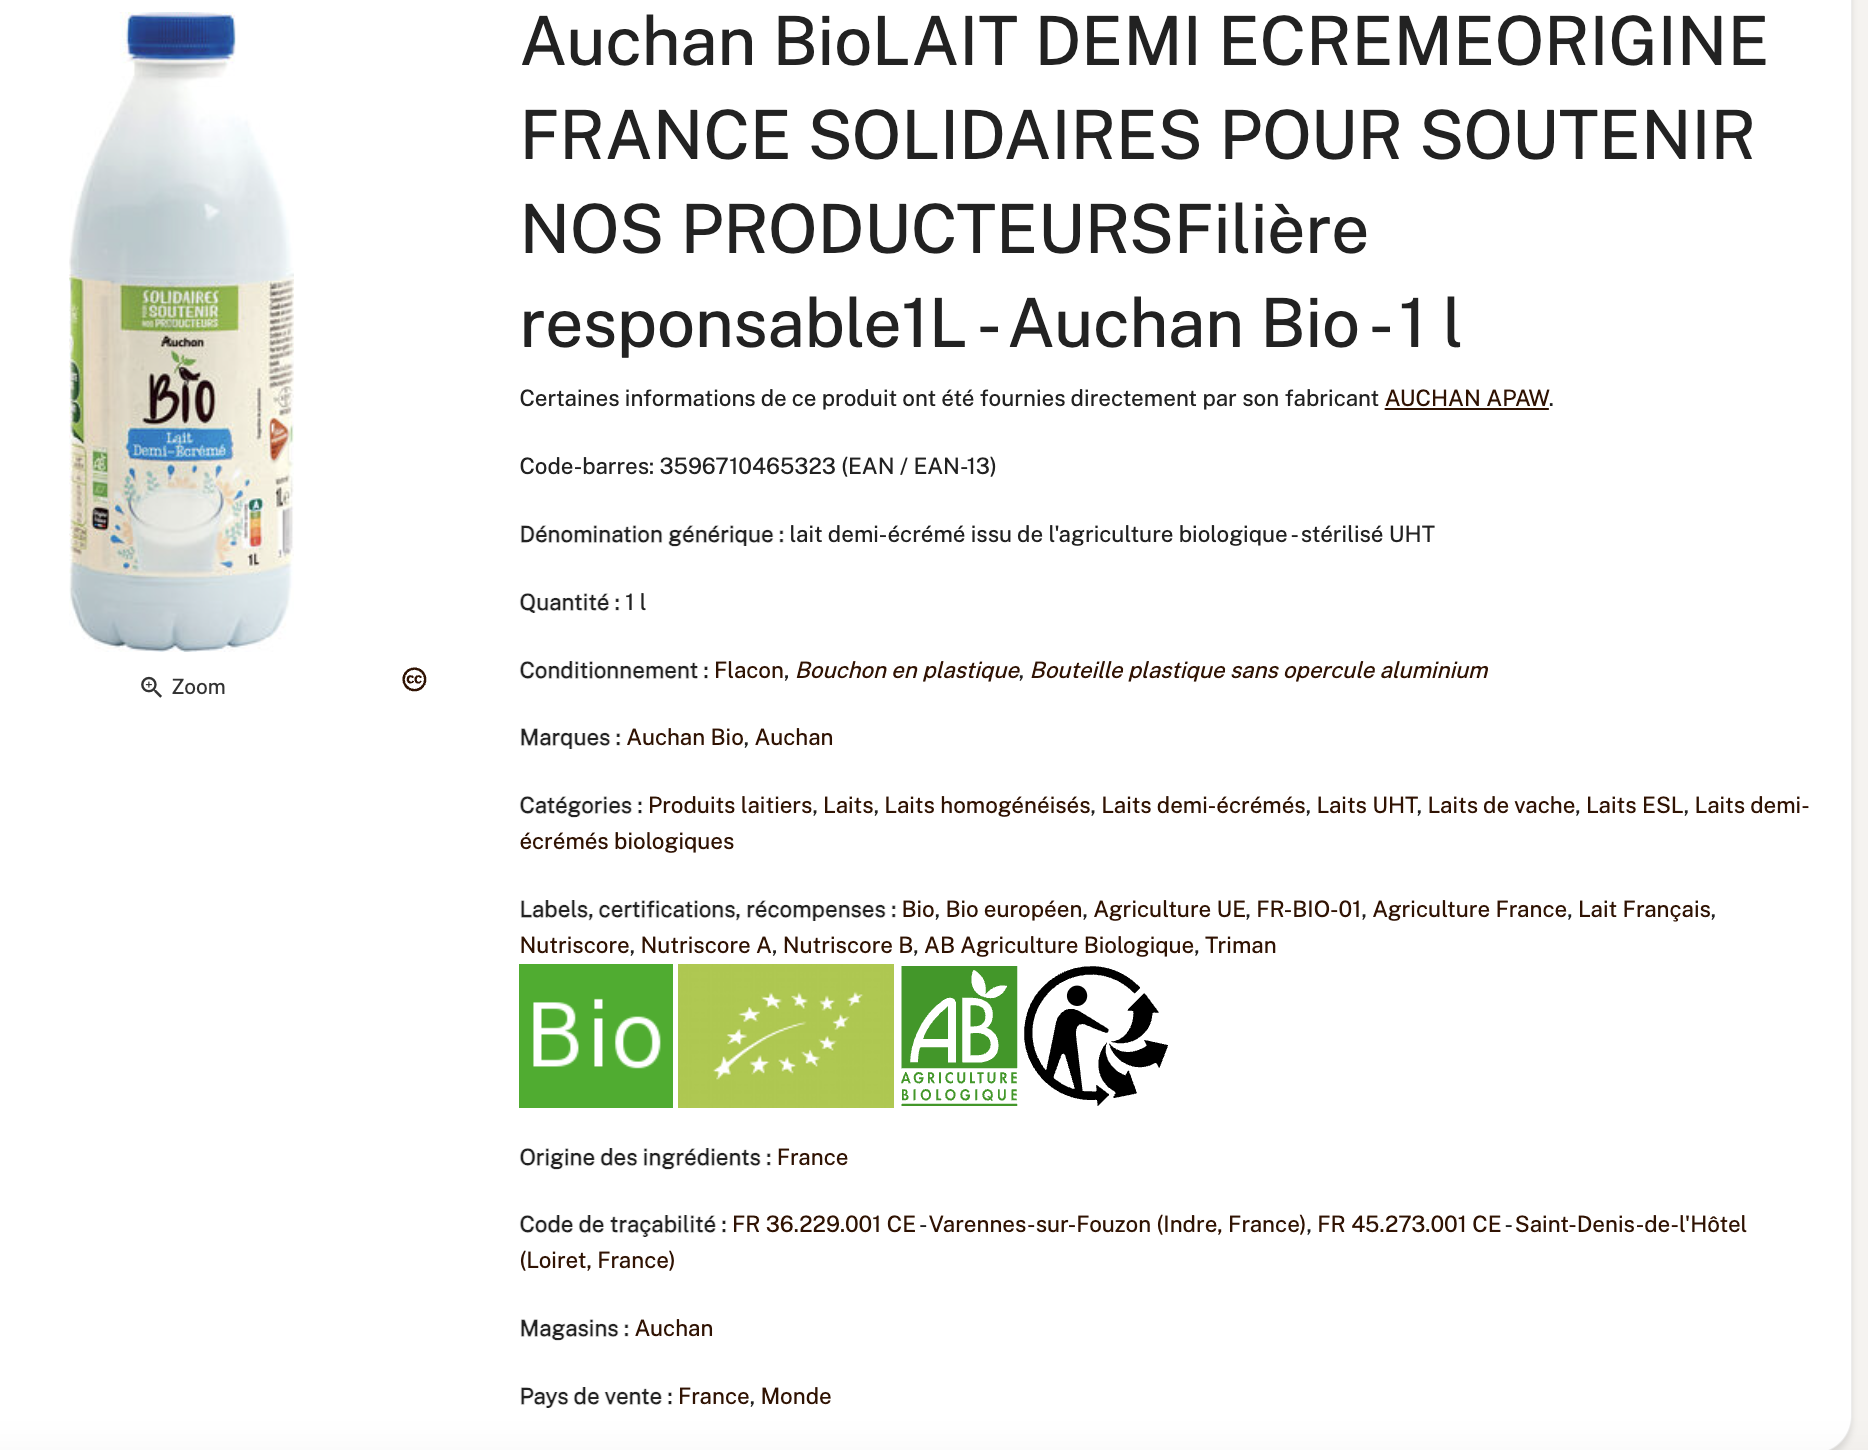

In [ ]:
#delice days = jeu concours pour gagner des gammes de produit

arcom_df.loc[arcom_df['Marque'] == 'kraft foods europe']

,N° Fiche,year,week,N° Version,Annonceur,Marque,Produit,Date,Date VP,Média,...,Hashtag,clean_script,mots_clefs_themes,mots_clefs_themes_str,visuel_str,visuel_clean,visuel_clean_bigram,clean_bigram_total,date_iso,month_nb
866,4890550,2014,19,333195716.0,MONDELEZ INTERNATIONAL,kraft foods europe,HELLOJOY FR,06/05/2014,06/05/2014,TÉLÉVISION,...,NaN,"['villes', 'nom', 'disons', 'difficile', 'port...","VILLE , CAMPAGNE , TRACTEUR , BALLON DE BAUDRU...",ville campagne tracteur ballon_de_baudruche pa...,NaN,panneau comporter nom ville incongru sinistre ...,panneau_comporter nom ville incongru sinistre ...,ville campagne tracteur ballon_de_baudruche pa...,2014-05-06,5
2031,4721155,2014,3,332707528.0,MONDELEZ INTERNATIONAL,kraft foods europe,LES DELICES DAYS GAMME ALIMENTAIRE,15/01/2014,NaN,TÉLÉVISION,...,NaN,"['chérie', 'mis', 'courses', 'placard', 'droit...","CUISINE , SALLE DE BAINS , JEU , MARQUE , CHER...",cuisine salle_de_bains jeu marque chercher amo...,NaN,homme demande femme endroit entreposer course ...,homme demande femme endroit entreposer course ...,cuisine salle_de_bains jeu marque chercher amo...,2014-01-15,1
2041,4721575,2014,3,332711573.0,MONDELEZ INTERNATIONAL,kraft foods europe,LES DELICES DAYS GAMME ALIMENTAIRE,15/01/2014,15/01/2014,TÉLÉVISION,...,NaN,"['chérie', 'mis', 'courses', 'placard', 'droit...","CUISINE , SALLE DE BAINS , JEU , MARQUE , CHER...",cuisine salle_de_bains jeu marque chercher dem...,NaN,homme demande femme endroit entreposer course ...,homme demande femme endroit entreposer course ...,cuisine salle_de_bains jeu marque chercher dem...,2014-01-15,1
7910,5212363,2015,4,334645263.0,MONDELEZ INTERNATIONAL,kraft foods europe,LES DELICES DAYS GAMME ALIMENTAIRE,20/01/2015,15/01/2014,TÉLÉVISION,...,NaN,"['chérie', 'mis', 'courses', 'placard', 'droit...","CUISINE , SALLE DE BAINS , JEU , MARQUE , CHER...",cuisine salle_de_bains jeu marque chercher cou...,NaN,homme demande femme endroit entreposer course ...,homme demande femme endroit entreposer course ...,cuisine salle_de_bains jeu marque chercher cou...,2015-01-20,13


In [ ]:
#salaisons auvergne : je ne sais pas

In [ ]:
#'sfae' : secteur francais des aliments pour l'enfance
#sps sarl : ?
# transhumancia
# inovea